<a href="https://colab.research.google.com/github/ghdakrk/ML/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

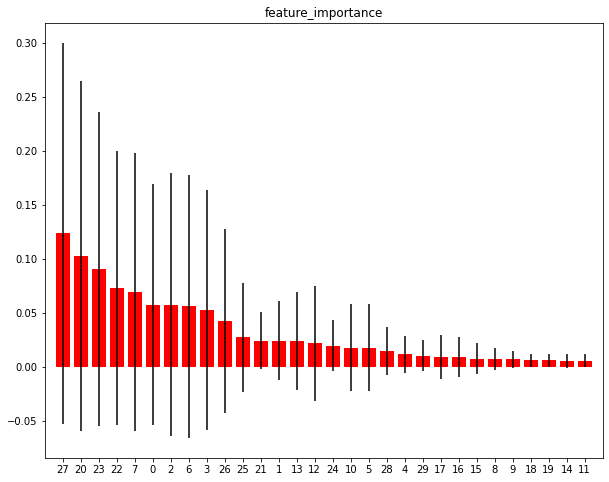

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X = bc.data
y = bc.target

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

importances = forest.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,8))

plt.title("feature_importance")
plt.bar(bc.feature_names, importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
model1 = LogisticRegression()
model2 = QuadraticDiscriminantAnalysis()
model3 = GaussianNB()
model4 = DecisionTreeClassifier()
model = VotingClassifier(
 estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
 voting='soft', weights=[1, 1.5, 1])
cv = KFold(5, shuffle=True, random_state=0)
accuracy = cross_val_score(model, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9683744760130415, 0.018049172540641666)

In [11]:
from sklearn.ensemble import BaggingClassifier
model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
accuracy1 = cross_val_score(model1, X, y, scoring="accuracy", cv=cv)
accuracy2 = cross_val_score(model2, X, y, scoring="accuracy", cv=cv)
accuracy1.mean(), accuracy1.std(), accuracy2.mean(), accuracy2.std()


(0.9332712311752832,
 0.02110597597311574,
 0.9560937742586555,
 0.019175996033432424)

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=500, random_state=0).fit(X, y)
accuracy = cross_val_score(forest, X, y, scoring="accuracy", cv=cv)
accuracy.mean(), accuracy.std()

(0.9701754385964911, 0.020459480332790547)

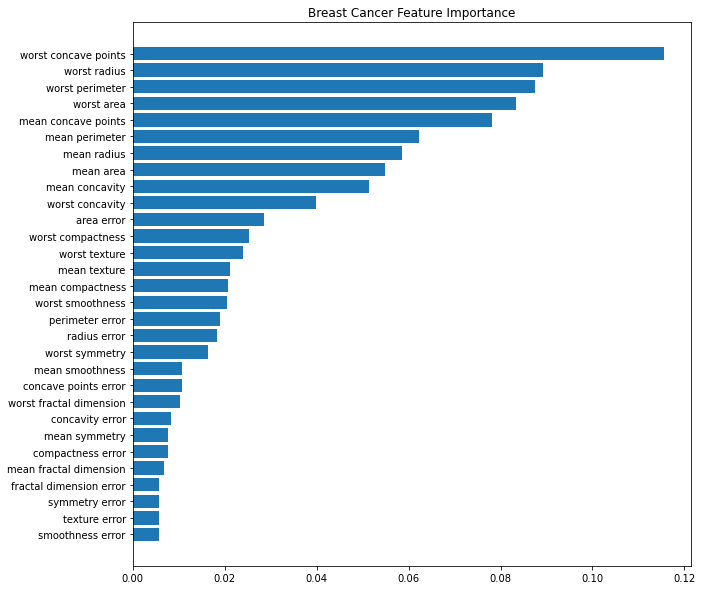

In [13]:
idx = np.argsort(forest.feature_importances_)
names = cancer.feature_names[idx]
values = forest.feature_importances_[idx]
plt.figure(figsize=(10, 10))
plt.barh(names, values)
plt.title("Breast Cancer Feature Importance")
plt.show()